In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [37]:
df=pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [38]:
print(df["Extracurricular Activities"].unique())


<StringArray>
['Yes', 'No']
Length: 2, dtype: str


In [39]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [40]:
for i in ["Hours Studied","Sleep Hours","Sample Question Papers Practiced"]:
    print(i,":",df[i].unique())
    print("="*60)

Hours Studied : [7 4 8 5 3 6 2 1 9]
Sleep Hours : [9 4 7 5 8 6]
Sample Question Papers Practiced : [1 2 5 6 0 8 3 4 9 7]


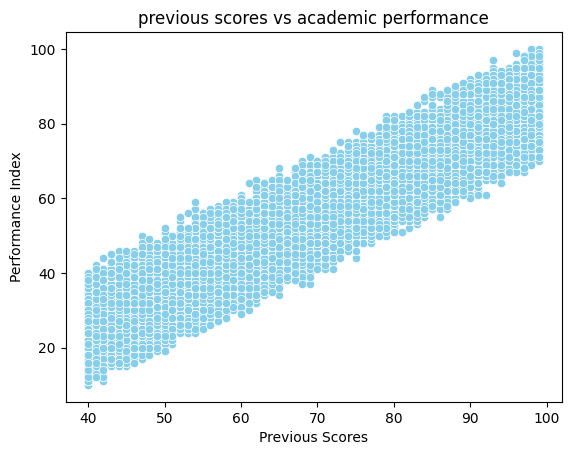

In [41]:
sns.scatterplot(x="Previous Scores",y="Performance Index",color="skyblue",data=df)
plt.title("previous scores vs academic performance")
plt.show()

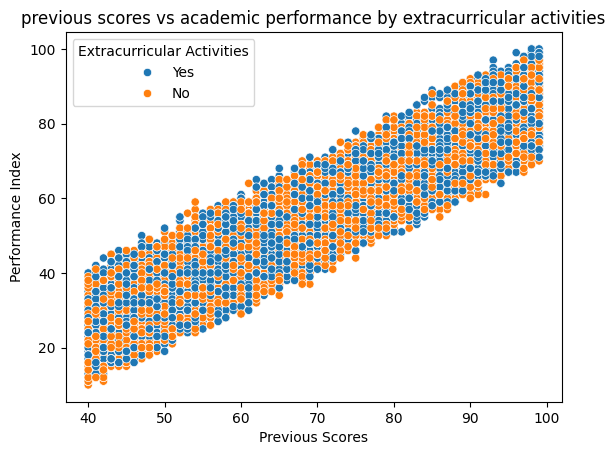

In [42]:
sns.scatterplot(x="Previous Scores",y="Performance Index",hue="Extracurricular Activities",color="skyblue",data=df)
plt.title("previous scores vs academic performance by extracurricular activities")
plt.show()

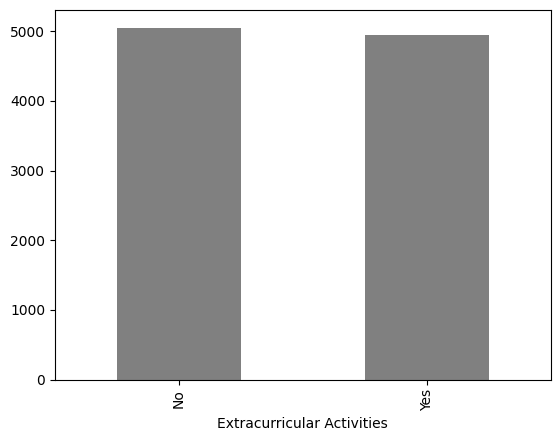

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


In [43]:
df["Extracurricular Activities"].value_counts().plot(kind="bar",color="gray")
plt.show()
print(df["Extracurricular Activities"].value_counts())

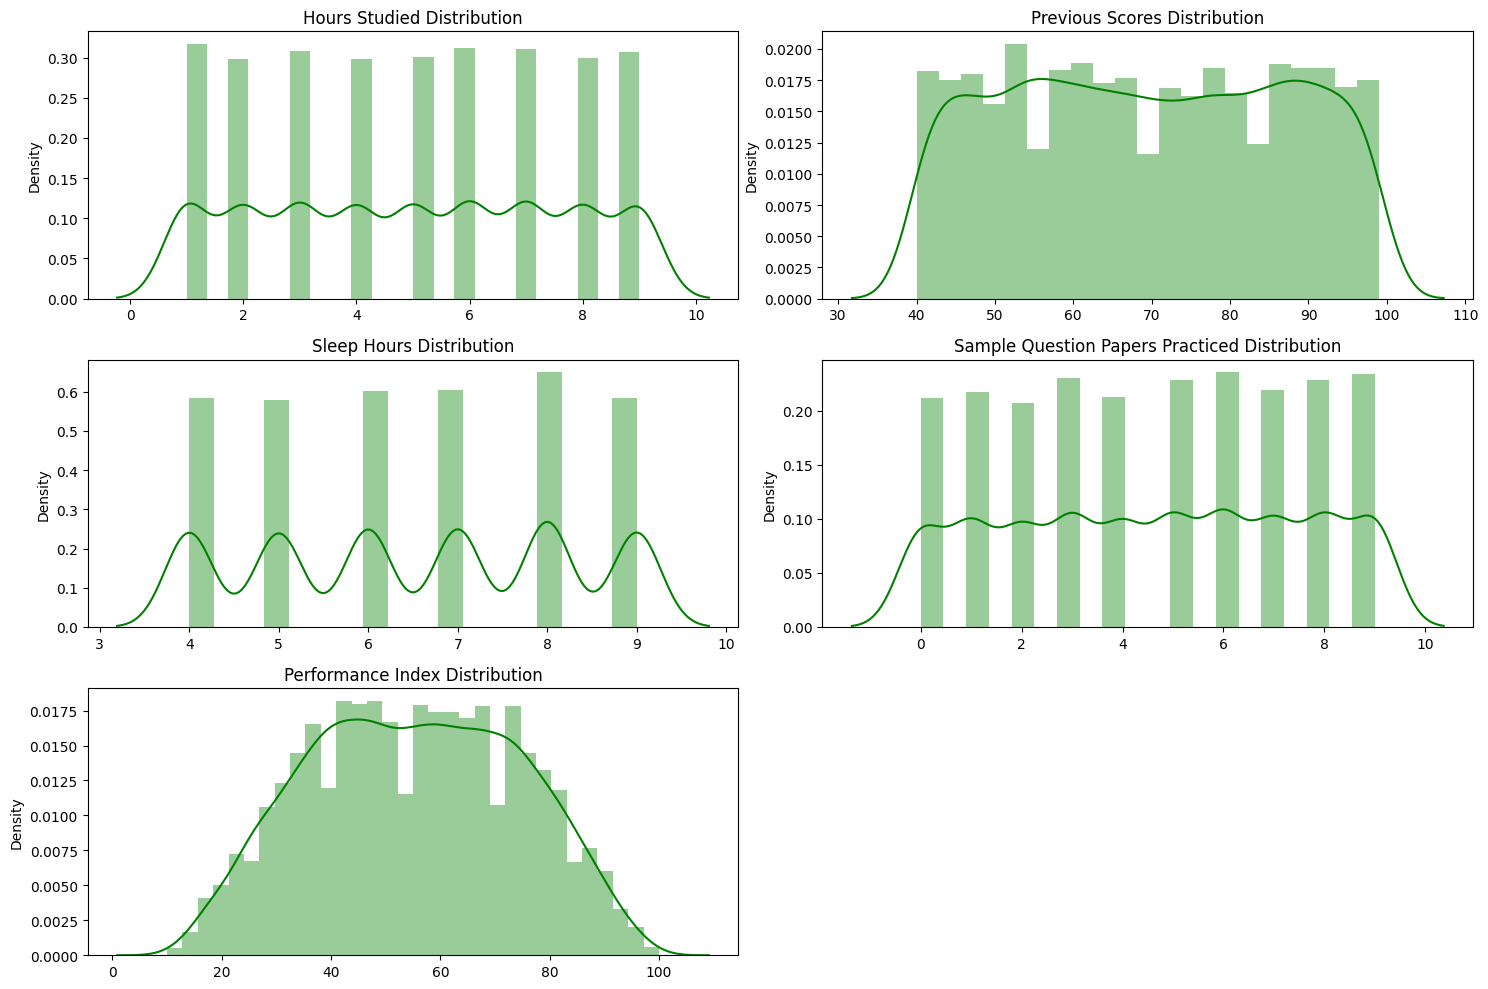

In [44]:
plt.figure(figsize=(15,10))
for i,col in enumerate(["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Performance Index"]):
    plt.subplot(3,2,i+1)
    sns.distplot(df[col],color="green")
    plt.title(f"{col} Distribution")
    plt.xlabel("")
plt.tight_layout()
plt.show()

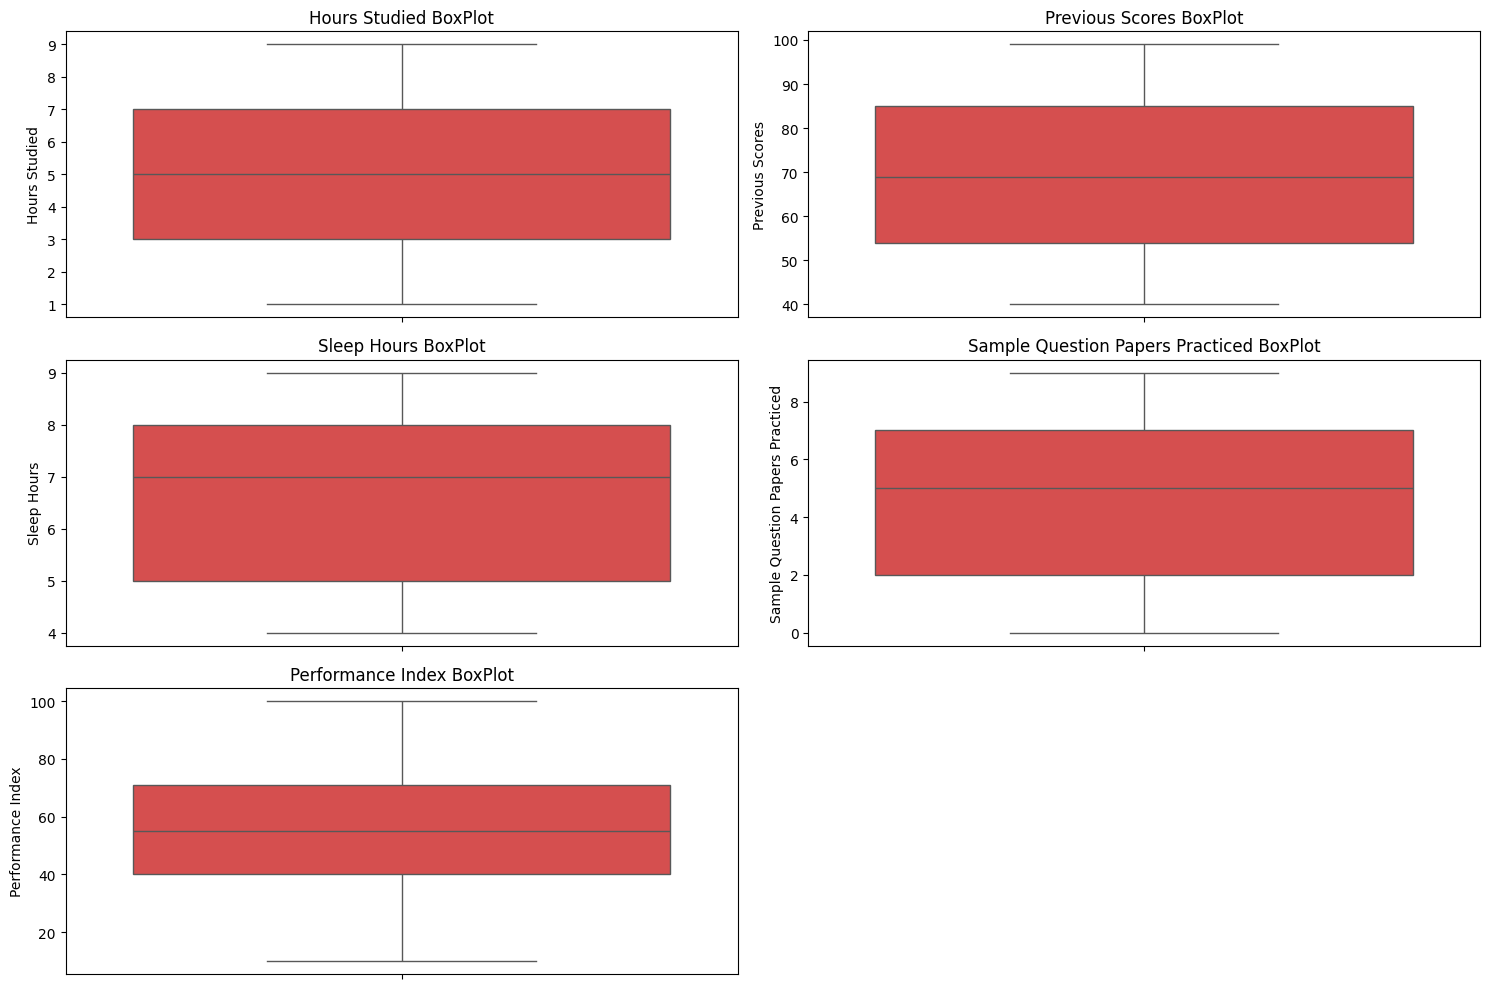

In [45]:
plt.figure(figsize=(15,10))
for i,col in enumerate(["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Performance Index"]):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[col],color="#EB3939")
    plt.title(f"{col} BoxPlot")
    plt.xlabel("")
plt.tight_layout()
plt.show()

In [46]:
if df["Extracurricular Activities"].dtype != "int64":
    df["Extracurricular Activities"] = (
        df["Extracurricular Activities"] == "Yes"
    ).astype(int)





In [47]:
print(df["Extracurricular Activities"].unique())
print(df.isnull().sum())


[1 0]
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [48]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [53]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(final_model, X, y, cv=5, scoring="r2")

print("Cross Validation R2 scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())


Cross Validation R2 scores: [0.98879624 0.98827438 0.9891418  0.989087   0.98836991]
Average CV R2: 0.9887338678935833


In [54]:
from sklearn.model_selection import train_test_split

X = df.drop("Performance Index",axis=1)
y = df["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print((f"X train shape : {X_train.shape}"))
print(f"X test shape : {X_test.shape}")
print(f"Y train shape : {y_train.shape}")


X train shape : (7500, 5)
X test shape : (2500, 5)
Y train shape : (7500,)


In [55]:
X_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4901,5,49,0,5,5
4375,7,88,1,4,9
6698,3,94,1,7,1
9805,9,54,1,5,9
1101,4,56,1,8,6


In [56]:
def calculate_model_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [57]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "Elasticnet": ElasticNet(),
    "K-Neighbors Regressor"  : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

In [58]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [59]:
X_train.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4901,5,49,0,5,5
4375,7,88,1,4,9
6698,3,94,1,7,1
9805,9,54,1,5,9
1101,4,56,1,8,6
9537,3,72,1,8,6
7655,7,55,1,7,5
5235,7,57,1,9,9
5165,6,52,0,4,4
118,3,67,0,9,8


In [60]:
y_pred = final_model.predict(X_test)


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = final_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Final Model Performance")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


Final Model Performance
MAE: 1.5975792091646108
RMSE: 2.008119571992444
R2: 0.9890550757439104


In [62]:
import joblib
joblib.dump(final_model, "student_performance_model.pkl")



['student_performance_model.pkl']

In [63]:
# Example student input
sample_input = [[4, 80, 1, 8, 3]]  
# Order: [Hours Studied, Previous Scores, Extracurricular(1/0), Sleep Hours, Papers Practiced]

prediction = final_model.predict(sample_input)

print("Predicted Performance Index:", prediction[0])


Predicted Performance Index: 63.83176116365656


In [64]:
print("Intercept:", final_model.intercept_)


Intercept: -33.86980422343317


In [65]:
prediction = final_model.predict(sample_input)[0]
prediction = max(0, min(100, prediction))

print("Predicted Performance Index:", prediction)


Predicted Performance Index: 63.83176116365656


In [66]:
sample_input = [[2, 20, 0, 1, 0]]  
# Order: [Hours Studied, Previous Scores, Extracurricular(1/0), Sleep Hours, Papers Practiced]

prediction = final_model.predict(sample_input)

print("Predicted Performance Index:", prediction[0])

Predicted Performance Index: -7.35549507820118


In [67]:
df["Extracurricular Activities"].unique()


array([1, 0])

In [68]:
print(X.isnull().sum())


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
dtype: int64


In [69]:
print(X.isnull().sum().sum())


0


In [70]:
X_train.isnull().sum()
X_test.isnull().sum()


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
dtype: int64